In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.inspection import plot_partial_dependence

# Data 5

In [2]:
# Read in
df5 = pd.read_csv('../data/df5.csv')

In [3]:
# Inspect
df5.head()

,x1,x2,y
0,A2,B1,5.193748
1,A1,B1,0.900294
2,A1,B1,-0.432256
3,A2,B1,4.349755
4,A2,B2,1.375544


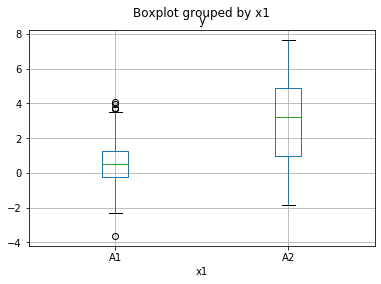

In [4]:
# Plot x1
df5.boxplot('y', by='x1')

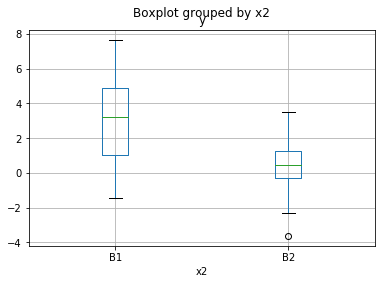

In [5]:
# Plot x2
df5.boxplot('y', by='x2')

In [6]:
# Fit simple decision tree with one split
X, y = pd.get_dummies(df5[['x1', 'x2']], prefix=['x1', 'x2']), df5['y']
tree5 = DecisionTreeRegressor(
    max_depth=1,
    random_state=666
).fit(X, y)

[Text(223.2, 203.85000000000002, 'x2_B2 <= 0.5\nmse = 4.787\nsamples = 1000\nvalue = 1.796'),
 Text(111.6, 67.94999999999999, 'mse = 4.811\nsamples = 521\nvalue = 3.03'),
 Text(334.79999999999995, 67.94999999999999, 'mse = 1.304\nsamples = 479\nvalue = 0.454')]

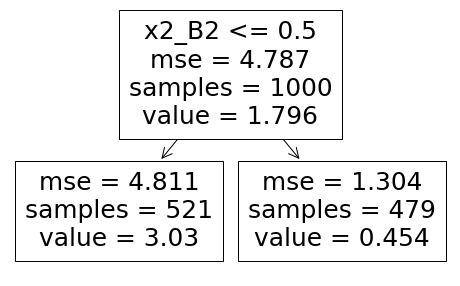

In [7]:
# Look at the tree itself
plt.figure(figsize=(8, 5))
plot_tree(tree5, feature_names=X.columns)

Looks like it split on x2_B2.  The right split also has a much lower MSE than the rest of the values!

Let's build another layer to see what happens.

In [8]:
# Two splits
X, y = pd.get_dummies(df5[['x1', 'x2']], prefix=['x1', 'x2']), df5['y']
tree5_depth2 = DecisionTreeRegressor(
    max_depth=2,
    random_state=666
).fit(X, y)

[Text(223.2, 226.5, 'x2_B2 <= 0.5\nmse = 4.787\nsamples = 1000\nvalue = 1.796'),
 Text(111.6, 135.9, 'x1_A1 <= 0.5\nmse = 4.811\nsamples = 521\nvalue = 3.03'),
 Text(55.8, 45.29999999999998, 'mse = 1.082\nsamples = 265\nvalue = 4.941'),
 Text(167.39999999999998, 45.29999999999998, 'mse = 0.98\nsamples = 256\nvalue = 1.052'),
 Text(334.79999999999995, 135.9, 'x1_A2 <= 0.5\nmse = 1.304\nsamples = 479\nvalue = 0.454'),
 Text(279.0, 45.29999999999998, 'mse = 1.111\nsamples = 228\nvalue = -0.103'),
 Text(390.59999999999997, 45.29999999999998, 'mse = 0.941\nsamples = 251\nvalue = 0.961')]

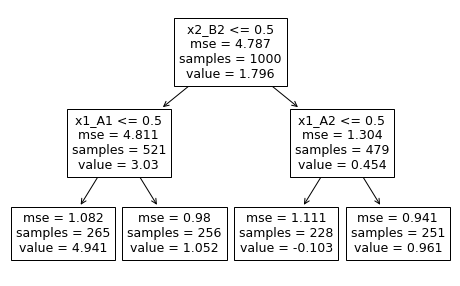

In [9]:
# Look at the tree itself
plt.figure(figsize=(8, 5))
plot_tree(tree5_depth2, feature_names=X.columns)

Quite a bit of drop in MSE, especially on the left side.  Both split on x1 but differ in the specific value they picked (i.e. the left side picked x1_A1 and the right side picked x1_A2).  However, these net to the same thing because there are only two possible values.

It doesn't seem like another layer will build anything because we've already split by all possible values.  Let's confirm that.

[Text(223.2, 226.5, 'x2_B2 <= 0.5\nmse = 4.787\nsamples = 1000\nvalue = 1.796'),
 Text(111.6, 135.9, 'x1_A1 <= 0.5\nmse = 4.811\nsamples = 521\nvalue = 3.03'),
 Text(55.8, 45.29999999999998, 'mse = 1.082\nsamples = 265\nvalue = 4.941'),
 Text(167.39999999999998, 45.29999999999998, 'mse = 0.98\nsamples = 256\nvalue = 1.052'),
 Text(334.79999999999995, 135.9, 'x1_A2 <= 0.5\nmse = 1.304\nsamples = 479\nvalue = 0.454'),
 Text(279.0, 45.29999999999998, 'mse = 1.111\nsamples = 228\nvalue = -0.103'),
 Text(390.59999999999997, 45.29999999999998, 'mse = 0.941\nsamples = 251\nvalue = 0.961')]

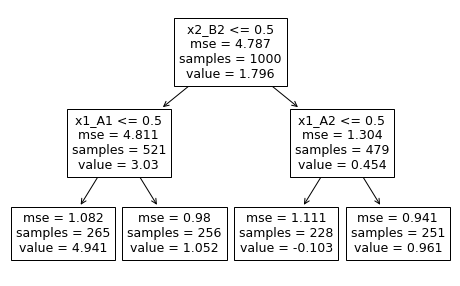

In [10]:
# Three splits
X, y = pd.get_dummies(df5[['x1', 'x2']], prefix=['x1', 'x2']), df5['y']
tree5_depth3 = DecisionTreeRegressor(
    max_depth=3,
    random_state=666
).fit(X, y)

# Look at the tree itself
plt.figure(figsize=(8, 5))
plot_tree(tree5_depth3, feature_names=X.columns)

Yep, no new layer forms!

If we build instead by specifying the number of leaves, which node would build first?

[Text(267.84000000000003, 226.5, 'x2_B2 <= 0.5\nmse = 4.787\nsamples = 1000\nvalue = 1.796'),
 Text(178.56, 135.9, 'x1_A1 <= 0.5\nmse = 4.811\nsamples = 521\nvalue = 3.03'),
 Text(89.28, 45.29999999999998, 'mse = 1.082\nsamples = 265\nvalue = 4.941'),
 Text(267.84000000000003, 45.29999999999998, 'mse = 0.98\nsamples = 256\nvalue = 1.052'),
 Text(357.12, 135.9, 'mse = 1.304\nsamples = 479\nvalue = 0.454')]

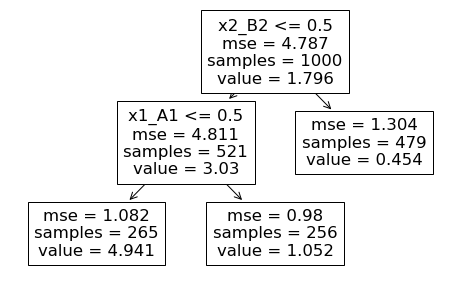

In [11]:
# Three leaf nodes
X, y = pd.get_dummies(df5[['x1', 'x2']], prefix=['x1', 'x2']), df5['y']
tree5_maxleaf3 = DecisionTreeRegressor(
    max_leaf_nodes=3,
    random_state=666
).fit(X, y)

# Look at the tree itself
plt.figure(figsize=(8, 5))
plot_tree(tree5_maxleaf3, feature_names=X.columns)

# Data 6

In [12]:
# Read in
df6 = pd.read_csv('../data/df6.csv')

In [13]:
# Inspect
df6.head(10)

,x,y
0,2.218651,1.184560
1,2.906897,3.216393
2,3.057199,3.676579
3,3.138405,2.588413
4,3.076162,1.272983
5,NaN,-1.738836
6,4.026340,3.120833
7,1.761873,1.671126
8,NaN,-2.859447
9,2.609196,3.211054


We have to handle NaNs differently in decision trees than we do in regressions.  This particular scikit tree doesn't natively support NaN values (i.e. it won't split on "is missing").

But, as with regression, the important first question is **do we care about these missing x values?**  Repeating what we talked about the:

- If yes, then we need to find a way to model them.  There are a number of ways to do this, including but not limited to:
    - Fit two separate models, one for nulls (e.g. the "mean" y value) and one for non-nulls (e.g. a standard tree)
    - Find a clever way to incorporate them into a single tree (e.g. impute the mean x-value for missing values)
- If no, then we can simply filter them out.  But in Derek's opinion you should very rarely do this because this "missingness" usually means something like important, such as an error in the data collection or data aggregation/merging process.

Let's visualize the y distributions for missing and non-missing x values.

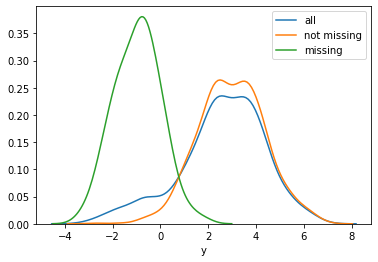

In [14]:
sb.distplot(df6['y'], hist=False, label='all');
sb.distplot(df6[df6['x'].notnull()]['y'], hist=False, label='not missing');
sb.distplot(df6[df6['x'].isnull()]['y'], hist=False, label='missing');

It looks like rows with x missing have quite different y-values than non-missing rows!

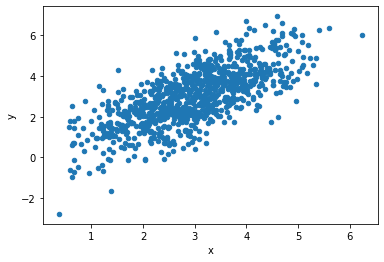

In [15]:
# Let's remind ourselves about the relationship between x and y
df6.plot('x', 'y', kind='scatter')

Standard imputation methods like taking the mean value could case some problems here.  It would roughly translate into the following:

- Missing values will get assigned an x-value around 3
- This will result in a bimodal distribution around x=3, with some (the non-missing values) having values around y=3 and the rest (the missing values) having values around y=-1

It's possible, though, that the tree might be able to distinguish these values if we also passed it an indicator of it being missing.  For funsies, let's try both approaches and see what seems to perform the best in this situation:

1. Mean imputation without a missing indicator
2. Mean imputation with a missing indicator

In [16]:
# Let's use scikit's imputation functionality to handle the imputations
df6_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df6_imp.fit(df6[['x']])
df6['x_impute'] = df6_imp.transform(df6[['x']])
df6['x_missing'] = df6['x'].apply(lambda x: 1 if np.isnan(x) else 0)

df6.head(10)

,x,y,x_impute,x_missing
0,2.218651,1.184560,2.218651,0
1,2.906897,3.216393,2.906897,0
2,3.057199,3.676579,3.057199,0
3,3.138405,2.588413,3.138405,0
4,3.076162,1.272983,3.076162,0
5,NaN,-1.738836,2.950982,1
6,4.026340,3.120833,4.026340,0
7,1.761873,1.671126,1.761873,0
8,NaN,-2.859447,2.950982,1
9,2.609196,3.211054,2.609196,0


In [17]:
# Without indicator
X_noind, y = df6[['x_impute']], df6['y']
tree6_noind = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=50,
    random_state=666
).fit(X_noind, y)

[Text(837.0, 498.3, 'x_impute <= 3.008\nmse = 3.222\nsamples = 1000\nvalue = 2.585'),
 Text(400.30434782608694, 407.70000000000005, 'x_impute <= 2.949\nmse = 2.586\nsamples = 560\nvalue = 1.589'),
 Text(327.52173913043475, 317.1, 'x_impute <= 1.844\nmse = 1.211\nsamples = 439\nvalue = 2.125'),
 Text(145.56521739130434, 226.5, 'x_impute <= 1.435\nmse = 1.181\nsamples = 127\nvalue = 1.391'),
 Text(72.78260869565217, 135.89999999999998, 'mse = 1.288\nsamples = 71\nvalue = 1.071'),
 Text(218.3478260869565, 135.89999999999998, 'mse = 0.751\nsamples = 56\nvalue = 1.796'),
 Text(509.4782608695652, 226.5, 'x_impute <= 2.605\nmse = 0.915\nsamples = 312\nvalue = 2.424'),
 Text(363.9130434782609, 135.89999999999998, 'x_impute <= 2.165\nmse = 0.844\nsamples = 201\nvalue = 2.247'),
 Text(291.1304347826087, 45.299999999999955, 'mse = 0.607\nsamples = 73\nvalue = 2.055'),
 Text(436.695652173913, 45.299999999999955, 'mse = 0.947\nsamples = 128\nvalue = 2.357'),
 Text(655.0434782608695, 135.89999999999

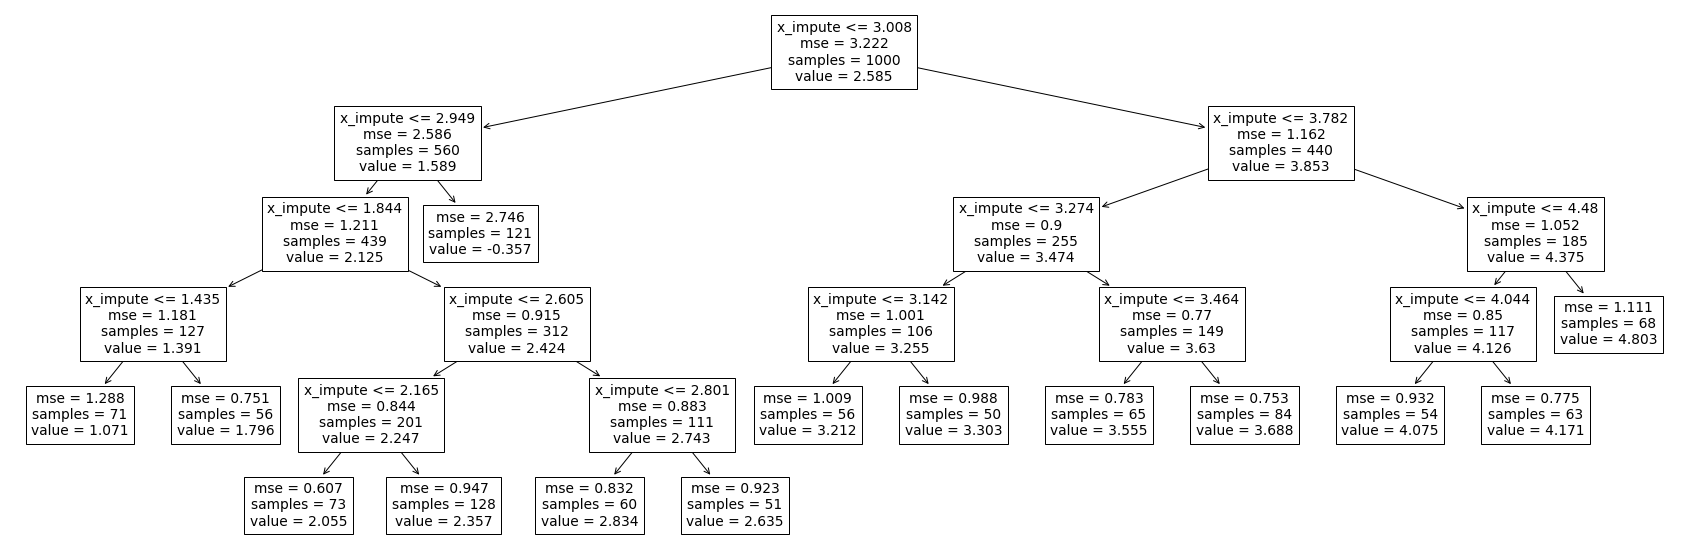

In [18]:
# Visualize tree
plt.figure(figsize=(30, 10))
plot_tree(tree6_noind, feature_names=X_noind.columns)

In [19]:
# With indicator
X_ind, y = df6[['x_impute', 'x_missing']], df6['y']
tree6_ind = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=50,
    random_state=666
).fit(X_ind, y)

[Text(871.875, 498.3, 'x_missing <= 0.5\nmse = 3.222\nsamples = 1000\nvalue = 2.585'),
 Text(802.125, 407.70000000000005, 'x_impute <= 3.008\nmse = 1.927\nsamples = 900\nvalue = 2.979'),
 Text(313.875, 317.1, 'x_impute <= 1.844\nmse = 1.228\nsamples = 460\nvalue = 2.143'),
 Text(139.5, 226.5, 'x_impute <= 1.435\nmse = 1.181\nsamples = 127\nvalue = 1.391'),
 Text(69.75, 135.89999999999998, 'mse = 1.288\nsamples = 71\nvalue = 1.071'),
 Text(209.25, 135.89999999999998, 'mse = 0.751\nsamples = 56\nvalue = 1.796'),
 Text(488.25, 226.5, 'x_impute <= 2.508\nmse = 0.948\nsamples = 333\nvalue = 2.429'),
 Text(348.75, 135.89999999999998, 'x_impute <= 2.165\nmse = 0.82\nsamples = 175\nvalue = 2.215'),
 Text(279.0, 45.299999999999955, 'mse = 0.607\nsamples = 73\nvalue = 2.055'),
 Text(418.5, 45.299999999999955, 'mse = 0.941\nsamples = 102\nvalue = 2.33'),
 Text(627.75, 135.89999999999998, 'x_impute <= 2.809\nmse = 0.983\nsamples = 158\nvalue = 2.667'),
 Text(558.0, 45.299999999999955, 'mse = 0.89\

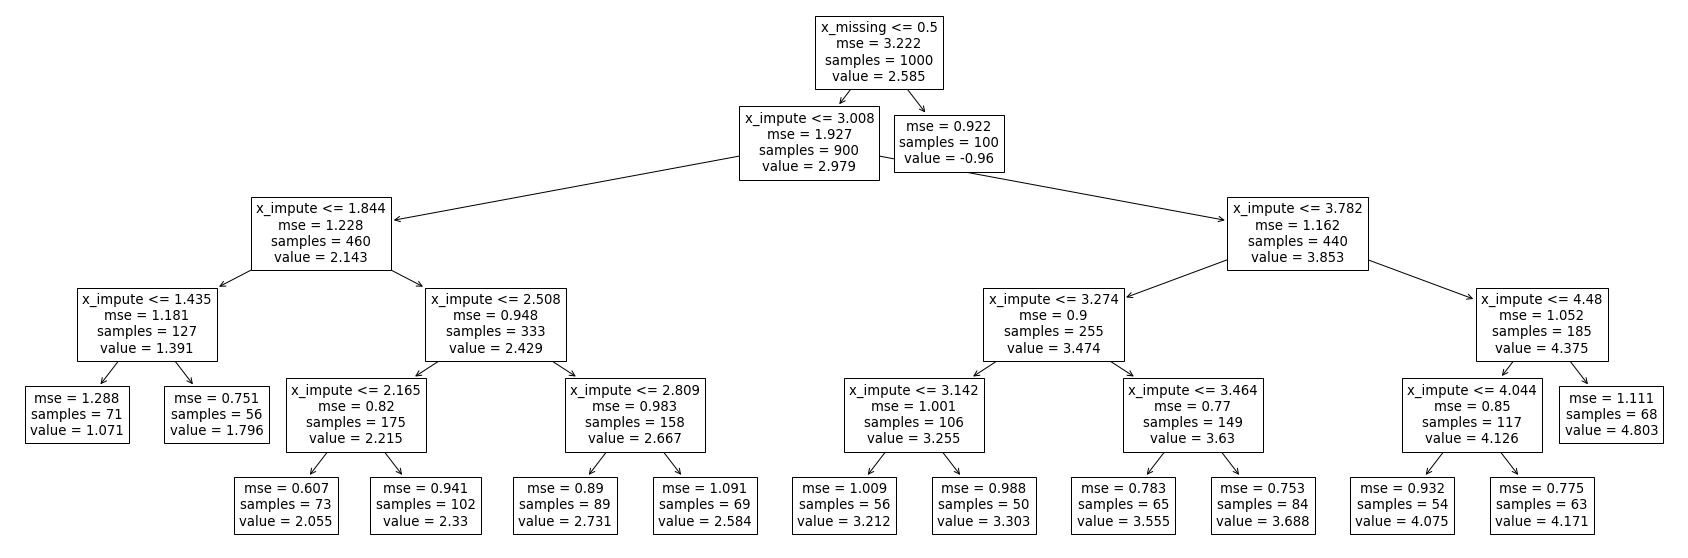

In [20]:
# Visualize tree
plt.figure(figsize=(30, 10))
plot_tree(tree6_ind, feature_names=X_ind.columns)

It looks like the "with indicator" model split on missing right away, where as the "without indicator" model ended up approximating this effect on the second split on the left (i.e. x > 2.949) but caught some non-NA values in its wake.

Let's summarize the error distributions of these two models to get sense of what's going on here.

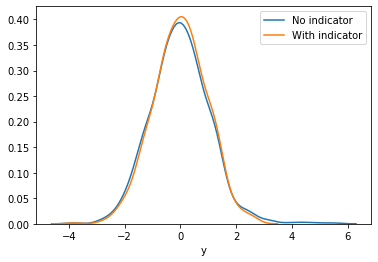

In [21]:
sb.distplot(df6['y'] - tree6_noind.predict(X_noind), hist=False, label='No indicator')
sb.distplot(df6['y'] - tree6_ind.predict(X_ind), hist=False, label='With indicator')

It looks like the with indicator model is slightly better (i.e. more centered and compact around 0), but arguably is marginal here.  The with indicator model is also a bit more interpretable by having the split right away, but that could just been the case for this particluar data set where the effect of missing values are quite distinct from the effect of non-missing values.

Other types of frameworks have other ways of dealing with missing values.  For example:

- `xgboost` will group NA values into either the left or right split depending on which it seems more "similar" with
- R's `gbm` package actually creates a separate split if missing values are found

Always double check how your modelling framework handles missing values to make sure you how the model will react them and if any particular preprocessing makes sense.

# Data 7

In [22]:
# Read in
df7 = pd.read_csv('../data/df7.csv')

In [23]:
# Inspect
df7.head()

,x,y
0,A,-0.437663
1,NaN,-2.953738
2,A,1.267236
3,B,2.445026
4,B,0.525157


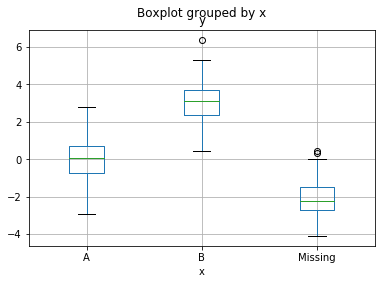

In [24]:
# Plot
df7.fillna('Missing').boxplot('y', by='x')

For categorical variables, we can treat missing values as another category just like we did in regression.

[Text(267.84000000000003, 226.5, 'x1_B <= 0.5\nmse = 4.22\nsamples = 1000\nvalue = 1.189'),
 Text(178.56, 135.9, 'x1_Missing <= 0.5\nmse = 1.68\nsamples = 538\nvalue = -0.385'),
 Text(89.28, 45.29999999999998, 'mse = 1.008\nsamples = 435\nvalue = 0.025'),
 Text(267.84000000000003, 45.29999999999998, 'mse = 0.807\nsamples = 103\nvalue = -2.118'),
 Text(357.12, 135.9, 'mse = 0.93\nsamples = 462\nvalue = 3.022')]

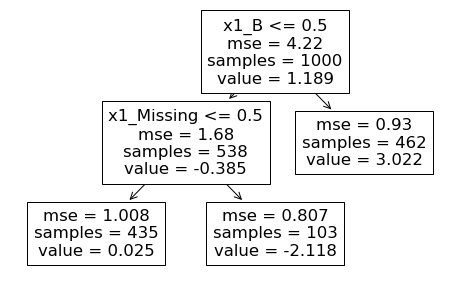

In [25]:
# Fit tree
X, y = pd.get_dummies(df7['x'].fillna('Missing'), prefix='x1'), df7['y']
tree7 = DecisionTreeRegressor(
    max_depth=3,
    random_state=666
).fit(X, y)

# Look at the tree itself
plt.figure(figsize=(8, 5))
plot_tree(tree7, feature_names=X.columns)

# Data 8

In [26]:
# Read in
df8 = pd.read_csv('../data/df8.csv')

In [27]:
# Inspect
df8.head()

,x1,x2,y
0,2.689212,C,2.194307
1,1.770311,A,4.538295
2,2.884945,B,1.717667
3,3.007989,C,5.219927
4,4.959291,A,7.623335


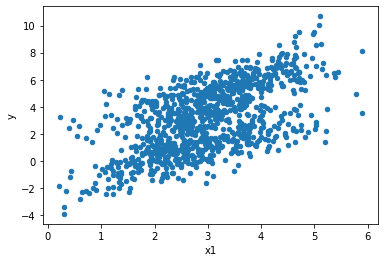

In [28]:
# Visualize x1
df8.plot('x1', 'y', kind='scatter')

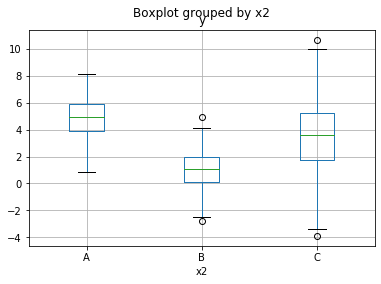

In [29]:
# Visualize x2
df8.boxplot('y', by='x2')

Now we need to be able to deal with both numeric variables and creating indicators.  Thankfully, get_dummies does this for us.

In [30]:
# Check it out
pd.get_dummies(df8[['x1', 'x2']], prefix='x2')

,x1,x2_A,x2_B,x2_C
0,2.689212,0,0,1
1,1.770311,1,0,0
2,2.884945,0,1,0
3,3.007989,0,0,1
4,4.959291,1,0,0
...,...,...,...,...
995,2.849187,0,0,1
996,3.081773,0,1,0
997,3.798788,0,0,1
998,3.148637,0,1,0


[Text(817.0714285714286, 498.3, 'x2_B <= 0.5\nmse = 5.948\nsamples = 1000\nvalue = 3.076'),
 Text(498.21428571428567, 407.70000000000005, 'x1 <= 2.792\nmse = 4.761\nsamples = 658\nvalue = 4.141'),
 Text(259.07142857142856, 317.1, 'x2_C <= 0.5\nmse = 3.729\nsamples = 289\nvalue = 2.58'),
 Text(159.42857142857142, 226.5, 'x1 <= 1.926\nmse = 1.258\nsamples = 144\nvalue = 3.913'),
 Text(79.71428571428571, 135.89999999999998, 'x1 <= 1.585\nmse = 1.304\nsamples = 53\nvalue = 3.32'),
 Text(39.857142857142854, 45.299999999999955, 'mse = 1.283\nsamples = 26\nvalue = 2.969'),
 Text(119.57142857142856, 45.299999999999955, 'mse = 1.092\nsamples = 27\nvalue = 3.658'),
 Text(239.1428571428571, 135.89999999999998, 'x1 <= 2.296\nmse = 0.906\nsamples = 91\nvalue = 4.258'),
 Text(199.28571428571428, 45.299999999999955, 'mse = 0.425\nsamples = 30\nvalue = 3.981'),
 Text(279.0, 45.299999999999955, 'mse = 1.086\nsamples = 61\nvalue = 4.395'),
 Text(358.71428571428567, 226.5, 'x1 <= 1.611\nmse = 2.669\nsamp

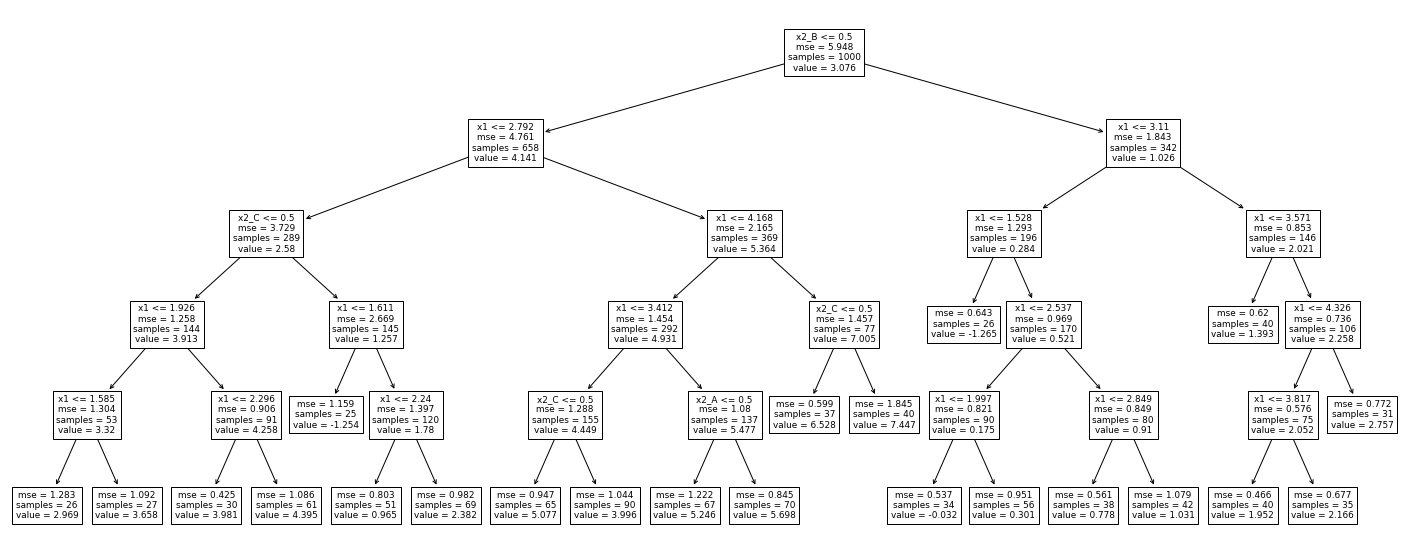

In [31]:
# Fit tree
X, y = pd.get_dummies(df8[['x1', 'x2']], prefix='x2'), df8['y']
tree8 = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=25,
    random_state=666
).fit(X, y)

# Look at the tree itself
plt.figure(figsize=(25, 10))
plot_tree(tree8, feature_names=X.columns)

This is a bit hard to make sense of, but these seem like the big takeaways:

- First split is on x2=B, which drastically reduces MSE on the right side in the first split.  This makes sense because in the initial boxplot it looked like A and C were a bit more similar to each other than either were to B.  Note that this initial split results in a roughly 2:1 ratio on the left:ride sides of the tree, so "impact" here is some combination of 1) error reduction and 2) sample size
- x2=A and x2=A are split on at different levels the left-hand side of the tree
- Beyond that, it's just stepping things out along x1 to create line approximations

Let's plot out the predictions as well.  However, now we have to a bit more careful because the relationships here are actually multivariate (i.e. the interplay between x1 and x2 can impact the resulting predictions in a way that is difficult to intuit).  Therefore, when we create a mesh, we need to also create the indicators.  And one for each possible values of x2, so three total meshes.

<Figure size 14400x720 with 0 Axes>

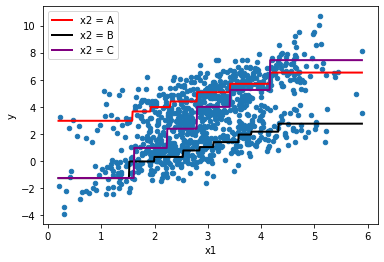

In [32]:
# Visualize
def create_x_mesh(x2_val):
    return pd.DataFrame({
        'x1': np.arange(df8['x1'].min(), df8['x1'].max(), .01),
        'x2_A': 1 if x2_val == 'A' else 0,
        'x2_B': 1 if x2_val == 'B' else 0,
        'x2_C': 1 if x2_val == 'C' else 0,
    })

X8_A_mesh = create_x_mesh('A')
y8_A = tree8.predict(X8_A_mesh)
X8_B_mesh = create_x_mesh('B')
y8_B = tree8.predict(X8_B_mesh)
X8_C_mesh = create_x_mesh('C')
y8_C = tree8.predict(X8_C_mesh)

plt.figure(figsize=(200, 10))
df8.plot('x1', 'y', kind='scatter')
plt.plot(X8_A_mesh['x1'], y8_A, color='red', linewidth=2, label='x2 = A')
plt.plot(X8_B_mesh['x1'], y8_B, color='black', linewidth=2, label='x2 = B')
plt.plot(X8_C_mesh['x1'], y8_C, color='purple', linewidth=2, label='x2 = C')
plt.legend()
plt.show()

It looks to be approximating those lines again!

Let's try bumping up the max depth to see if we can make it look any better.

<Figure size 14400x720 with 0 Axes>

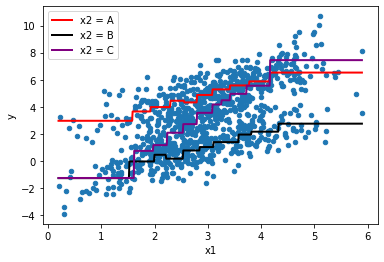

In [33]:
# Fit tree
X, y = pd.get_dummies(df8[['x1', 'x2']], prefix='x2'), df8['y']
tree8 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=25,
    random_state=666
).fit(X, y)

# Visualize
def create_x_mesh(x2_val):
    return pd.DataFrame({
        'x1': np.arange(df8['x1'].min(), df8['x1'].max(), .01),
        'x2_A': 1 if x2_val == 'A' else 0,
        'x2_B': 1 if x2_val == 'B' else 0,
        'x2_C': 1 if x2_val == 'C' else 0,
    })

X8_A_mesh = create_x_mesh('A')
y8_A = tree8.predict(X8_A_mesh)
X8_B_mesh = create_x_mesh('B')
y8_B = tree8.predict(X8_B_mesh)
X8_C_mesh = create_x_mesh('C')
y8_C = tree8.predict(X8_C_mesh)

plt.figure(figsize=(200, 10))
df8.plot('x1', 'y', kind='scatter')
plt.plot(X8_A_mesh['x1'], y8_A, color='red', linewidth=2, label='x2 = A')
plt.plot(X8_B_mesh['x1'], y8_B, color='black', linewidth=2, label='x2 = B')
plt.plot(X8_C_mesh['x1'], y8_C, color='purple', linewidth=2, label='x2 = C')
plt.legend()
plt.show()

A little better, but it also looks like noise in the data is impacting it a bit (e.g. look at the random blip upwards in the black line around x1=2).  Let's bump up the minimum required points to 50 and see how that changes things.

<Figure size 14400x720 with 0 Axes>

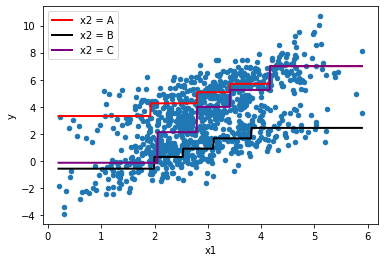

In [34]:
# Fit tree
X, y = pd.get_dummies(df8[['x1', 'x2']], prefix='x2'), df8['y']
tree8 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=50,
    random_state=666
).fit(X, y)

# Visualize
def create_x_mesh(x2_val):
    return pd.DataFrame({
        'x1': np.arange(df8['x1'].min(), df8['x1'].max(), .01),
        'x2_A': 1 if x2_val == 'A' else 0,
        'x2_B': 1 if x2_val == 'B' else 0,
        'x2_C': 1 if x2_val == 'C' else 0,
    })

X8_A_mesh = create_x_mesh('A')
y8_A = tree8.predict(X8_A_mesh)
X8_B_mesh = create_x_mesh('B')
y8_B = tree8.predict(X8_B_mesh)
X8_C_mesh = create_x_mesh('C')
y8_C = tree8.predict(X8_C_mesh)

plt.figure(figsize=(200, 10))
df8.plot('x1', 'y', kind='scatter')
plt.plot(X8_A_mesh['x1'], y8_A, color='red', linewidth=2, label='x2 = A')
plt.plot(X8_B_mesh['x1'], y8_B, color='black', linewidth=2, label='x2 = B')
plt.plot(X8_C_mesh['x1'], y8_C, color='purple', linewidth=2, label='x2 = C')
plt.legend()
plt.show()

Its definitely more linear, but at the expense of fewer splits.  This is where train/test/holdout comes in handy, but let's wait on that just a bit longer.

These plots we're creating are similar to "partial dependency" plots.  Here we have very few x2 values and only one numeric value so it's easy to plot out all combinations on a single plot, but in practical modelling this is impossible to do.  I recommend reading up on them here, they might come in handy for df9: https://scikit-learn.org/stable/modules/partial_dependence.html.

Let's do a quick test run.

C:\Users\Kenneth\Miniconda3\envs\d_anaconda\lib\site-packages\sklearn\tree\_classes.py:1233: FutureWarning: the classes_ attribute is to be deprecated from version 0.22 and will be removed in 0.24.
  warnings.warn(msg, FutureWarning)
C:\Users\Kenneth\Miniconda3\envs\d_anaconda\lib\site-packages\sklearn\inspection\_partial_dependence.py:713: FutureWarning: The fig parameter is deprecated in version 0.22 and will be removed in version 0.24
  warnings.warn("The fig parameter is deprecated in version "


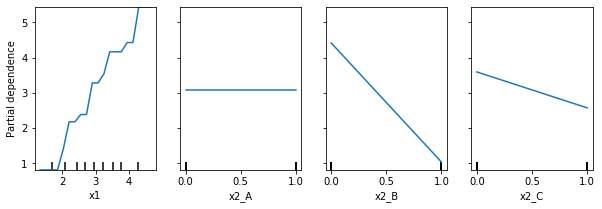

In [35]:
fig = plt.figure(figsize=(10, 3))
plot_partial_dependence(
    tree8,
    X,
    X.columns,
    n_cols=4,
    grid_resolution=20,
    fig=fig
)
fig.subplots_adjust(hspace=0.3)

The general takeaways are similar to our previous plots:

- As x1 increases, on average so does y
- For x2, B has the most negative association with y, followed by C, and lastly by A

Effectively, partial dependency plots are what regression does by design: Estimate the effect of changing a particular variable while holding the other variables constant.